<h1>Analysis based on Coronavirus : Anti-Lockdown</h1>

In [1]:
# https://praw.readthedocs.io/en/latest/code_overview/models/submission.html
# https://www.reddit.com/r/redditdev/comments/rhrz9f/404_response_using_literally_the_code_in_the_docs/

In [2]:
# pip install praw

In [3]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
# Set up Connection with Reddit

reddit = praw.Reddit(client_id='RyUj7x3RzmFJXAoPLzYCYw', \
                     client_secret='KbKj5ps21RQ_hZPJF1l7p1FGEDsyRA', \
                     user_agent='IS434_JoeyLau', \
                     username='joeylau2000', \
                     password='')

In [5]:
# Read CSV File in Data Frame

anti_lockdown_data = pd.read_csv('./Reddit_Data/Reddit_Coronavirus_Anti-Lockdown_100.csv')

In [6]:
# Sort Data Frame based on highest score

anti_lockdown_data_by_score = anti_lockdown_data.sort_values("score", ascending=False)

In [7]:
# Preview Data Frame

anti_lockdown_data_by_score

,author,title,score,id,url,comms_num,created,body,timestamp
4,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,ij071t,https://metro.co.uk/2020/08/29/anti-lockdown-p...,600,1.598735e+09,NaN,2020-08-30 05:05:25
3,Looddak,Health workers heckled by anti-lockdown protes...,2479,g4peuu,https://metro.co.uk/2020/04/20/health-workers-...,554,1.587373e+09,NaN,2020-04-20 17:03:14
18,Sarbat_Khalsa,Nurses to anti-lockdown activists: My life's o...,2308,gb1iml,https://www.aljazeera.com/news/2020/04/nurses-...,387,1.588272e+09,NaN,2020-05-01 02:40:27
12,Smellslikedls,Sweden isn't anywhere close to reaching herd i...,1834,gp2y7y,https://www.ctvnews.ca/world/sweden-isn-t-anyw...,484,1.590231e+09,NaN,2020-05-23 18:54:27
16,vostok-Abdullah,Counter-Protesters in Scrubs Block Some Anti-L...,1483,g4kdfs,https://www.news.com.au/national/counterprotes...,192,1.587349e+09,NaN,2020-04-20 10:16:05
...,...,...,...,...,...,...,...,...,...
84,etre_be,"Qantas, Virgin, Travel agencies unite over ant...",9,irmruq,https://www.skynews.com.au/details/_6190223524001,7,1.599952e+09,NaN,2020-09-13 07:03:04
93,shallah,Anti-lockdown sheriffs call on constituent pow...,7,gr6jh0,https://www.msn.com/en-us/news/us/anti-lockdow...,1,1.590530e+09,NaN,2020-05-27 05:54:26
95,stysoe,Could the Government make a COVID-19 vaccine m...,7,itjws9,https://www.abc.net.au/news/2020-09-16/fact-fi...,3,1.600212e+09,NaN,2020-09-16 07:12:18
92,signed7,"Israeli physicians, scientists to hold anti-lo...",6,iuog55,https://www.israelnationalnews.com/News/News.a...,1,1.600365e+09,NaN,2020-09-18 01:43:10


In [8]:
# Find unique authors (out of 100)

anti_lockdown_data_by_score.author.nunique() 

62

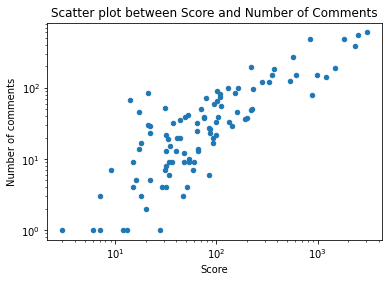

In [9]:
# Relationship between comments and upvotes 

ax = anti_lockdown_data_by_score.plot('score', 'comms_num', kind='scatter', logx=True, logy=True, title='Scatter plot between Score and Number of Comments')
ax.set(xlabel="Score", ylabel="Number of comments")
plt.savefig("./Reddit_Output/ScatterPlot", dpi=150, bbox_inches='tight', pad_inches=0.5)

In [10]:
# Only take users who posted more than once

repeating = anti_lockdown_data_by_score[anti_lockdown_data_by_score.duplicated(['author'], keep=False)] 

In [11]:
repeating

,author,title,score,id,url,comms_num,created,body,timestamp
30,DoremusJessup,Dozens of anti-lockdown protesters arrested in...,871,g80yc2,https://www.france24.com/en/20200425-dozens-of...,80,1.587847e+09,NaN,2020-04-26 04:43:04
2,signed7,Anti-lockdown march in Montreal draws several ...,617,ntvv7b,https://montrealgazette.com/news/local-news/an...,152,1.623014e+09,NaN,2021-06-07 05:16:18
21,Optimus_Pyrrha,Anti-Lockdown Protesters Burn Masks in Manhatt...,532,jzlsgw,https://www.msn.com/en-us/news/us/anti-lockdow...,124,1.606152e+09,NaN,2020-11-24 01:15:28
6,Altruistic_Astronaut,Fears Sydney anti-lockdown protest could be 's...,229,oqz3q8,https://www.abc.net.au/news/2021-07-25/sydney-...,97,1.627164e+09,NaN,2021-07-25 05:58:47
24,Zhana-Aul,"Anti-Lockdown Christian activist holds 2,500-p...",226,koonms,https://www.newsweek.com/anti-lockdown-christi...,51,1.609554e+09,NaN,2021-01-02 10:17:34
26,WearyThanks,Coronavirus: Fears Russian trolls are behind a...,217,gl3pgs,https://www.newshub.co.nz/home/world/2020/05/c...,48,1.589668e+09,NaN,2020-05-17 06:27:03
33,semaforic,Fox News Executive Tries To Rein In Stars As T...,198,g69h9a,https://www.npr.org/2020/04/22/840751725/fox-n...,38,1.587590e+09,NaN,2020-04-23 05:08:43
17,signed7,Hundreds of anti-lockdown protesters descend o...,152,m98qrb,https://www.lbc.co.uk/news/hundreds-of-anti-lo...,85,1.616252e+09,NaN,2021-03-20 23:01:17
20,signed7,Brexit Party re-branding as anti-lockdown part...,143,jmt23r,https://news.sky.com/story/brexit-party-re-bra...,29,1.604341e+09,NaN,2020-11-03 02:24:17
0,Majnum,Sydney anti-lockdown protest organiser jailed ...,129,p9x7gr,https://www.abc.net.au/news/2021-08-20/nsw-cov...,99,1.629715e+09,NaN,2021-08-23 18:42:10


In [12]:
len(repeating)

50

In [13]:
# Remove deleted users

repeating = repeating[repeating.author != 'None'] 

In [14]:
# Out of 100 posts, this is the amount of people who posted more than once 

repeating.author.nunique() 

12

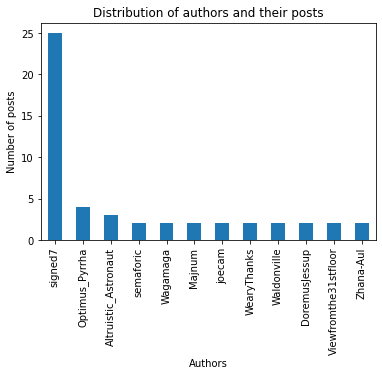

In [15]:
# See the distrubution of authors and their posts

ax = repeating.author.value_counts().plot(kind='bar',title='Distribution of authors and their posts') 
ax.set(xlabel="Authors", ylabel="Number of posts")
plt.savefig("./Reddit_Output/Bargraph",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [16]:
# Compiling a list of authors that appeared more than once on subreddit's top of all times 
# (Used for network graph and for get_user_posts function)

u_authors = list(repeating.author.unique()) 

In [17]:
def get_user_posts(author, n):
    
    redditor = reddit.redditor(author)
    user_posts_list = []
    
    for submission in redditor.submissions.top(limit = n):
        info_list = []
        info_list.append(submission.id)
        info_list.append(submission.score)
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(str(submission.subreddit))
        user_posts_list.append(info_list)
    
    a = sorted(user_posts_list, key=lambda x: x[1], reverse = True)
    user_posts_df = pd.DataFrame(a)
    return user_posts_df 

In [18]:
authors_df =  pd.DataFrame() 
authors_df = authors_df.fillna(0)
for u in u_authors: # Loops through every "influencer" user and gets 10 top posts per user
    c = get_user_posts(u, 10)
    authors_df = pd.concat([authors_df, c]) 

In [19]:
authors_df = authors_df.rename(index=str, # rename column names 
                               columns={0: "id", 1: "score", 2: "author", 3: "num_comments", 4: "subreddit"})

In [20]:
# Dataframe of other subreddits where authors posted 

authors_df.head(10) 

,id,score,author,num_comments,subreddit
0,901p5f,189351,DoremusJessup,18080,worldnews
1,i0ufzr,144898,DoremusJessup,4951,worldnews
2,t56xof,114745,DoremusJessup,5984,worldnews
3,kxc65n,114320,DoremusJessup,6012,worldnews
4,g95jat,108213,DoremusJessup,3067,worldnews
5,fggiom,104612,DoremusJessup,3417,worldnews
6,a0yeil,104074,DoremusJessup,9792,worldnews
7,kgzc56,101449,DoremusJessup,6559,worldnews
8,gscbwg,94076,DoremusJessup,3438,worldnews
9,t2d2a9,91908,DoremusJessup,5422,worldnews


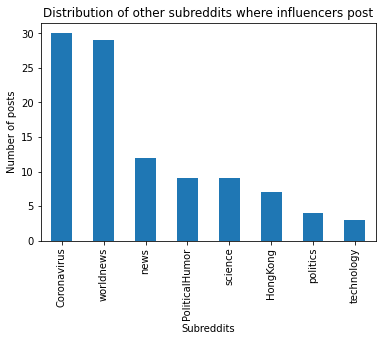

In [21]:
counts = authors_df['subreddit'].value_counts() 
# Only plot the subreddits that appear more than twice
ax = authors_df[authors_df['subreddit'].isin(counts[counts > 2].index)].subreddit.value_counts().plot(kind='bar',title='Distribution of other subreddits where influencers post') 
ax.set(xlabel="Subreddits", ylabel="Number of posts")
plt.savefig("./Reddit_Output/BargraphSubreddits",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [22]:
# Create a dataframe for network graph 

n_df = authors_df[['author', 'subreddit']] 
n_df.head()

,author,subreddit
0,DoremusJessup,worldnews
1,DoremusJessup,worldnews
2,DoremusJessup,worldnews
3,DoremusJessup,worldnews
4,DoremusJessup,worldnews


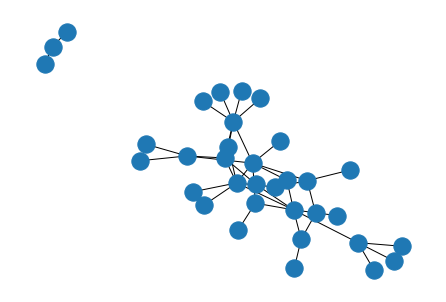

In [23]:
# Not a very meaningful graph

g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') 
nx.draw(g)

In [24]:
# Make list of unique subreddits to use in network graph 

subs = list(n_df.subreddit.unique()) 

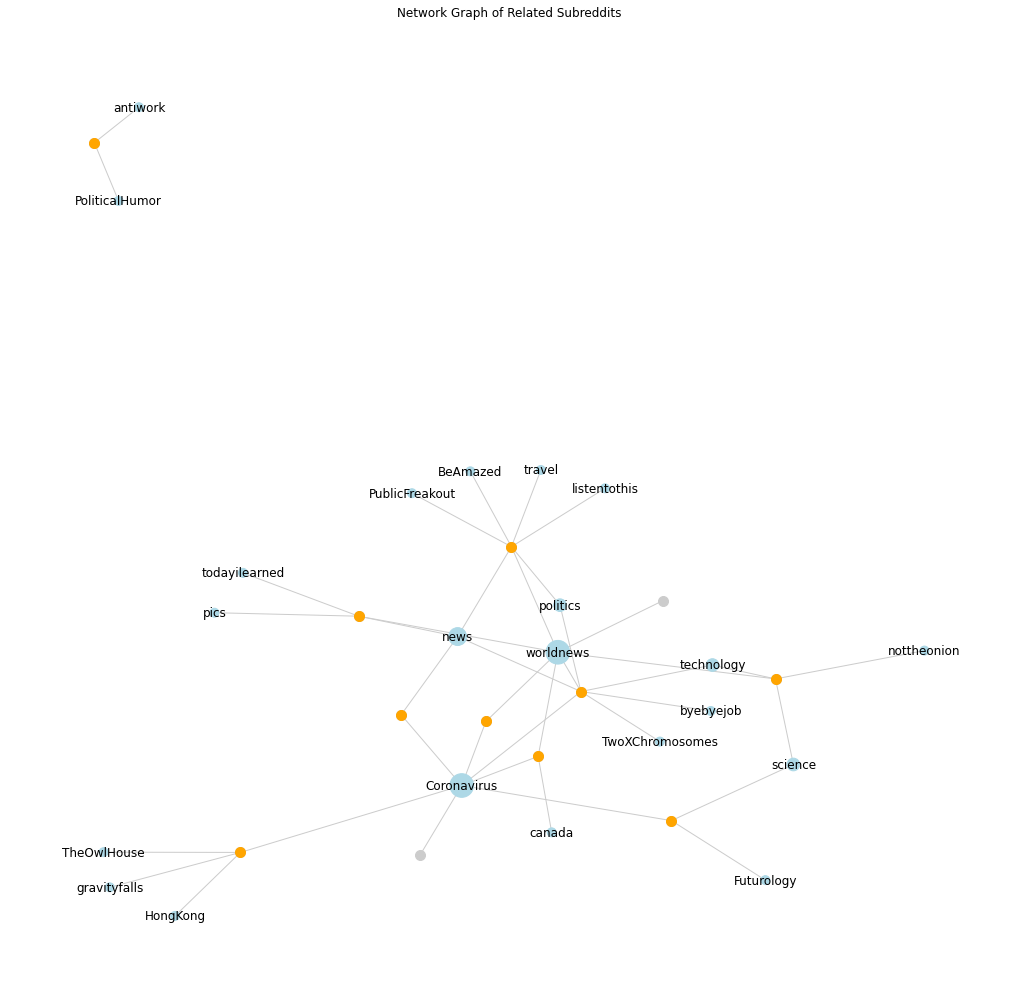

In [25]:
plt.figure(figsize=(18, 18))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') 

# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=50,scale=2)

# Draw the parts we want, edges thin and grey
# Influencers appear small and grey
# Subreddits appear in blue and sized according to their respective number of connections.
# Labels for subreddits ONLY
# People who have more connections are highlighted in color 

# Go through every subbreddit, ask the graph how many connections it has. 
# Multiply that by 80 to get the circle size
sub_size = [g.degree(sub) * 80 for sub in subs]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=subs, 
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all the entities 
nx.draw_networkx_nodes(g, layout, nodelist=u_authors, node_color='#cccccc', node_size=100)

# Draw highly connected influencers 
popular_people = [person for person in u_authors if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(subs, subs)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

# No axis needed
plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("./Reddit_Output/NetworkGraph", bbox_inches='tight',pad_inches=0.5)
plt.show()